# Logistic Regression or One node ANN :-
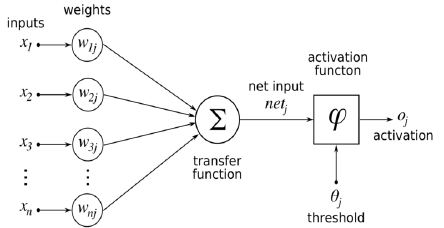
<br>
<br>
<b>Task is to build a Cat or non-cat classifier using Logistic Regression or One node ANN</b>
<b>
    - Data loading
    - Data prepocessing
    - Forward propogation 
    - Backward propogation
    - Building Model
    - Evalution 
</b>

 input  data shape = $ (n_x,m)$ <br>
 output data shape = $ (1,m)$

$ n_x =$  number of the features ,<br>
$ m = $ number of training examples

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## Data Loading

In [2]:
train_data=h5py.File('train_catvnoncat.h5','r')

In [3]:
test_data=h5py.File('test_catvnoncat.h5','r')

In [4]:
train_data.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [5]:
train_set_x=np.array(train_data.get('train_set_x'))

In [6]:
train_set_y=np.array(train_data.get('train_set_y'))

0


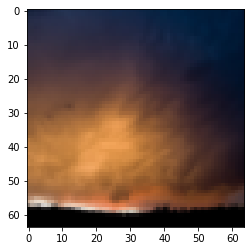

In [7]:
plt.imshow(train_set_x[0])
print(train_set_y[0])

1


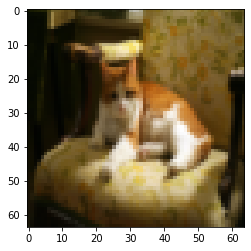

In [8]:
plt.imshow(train_set_x[7])
print(train_set_y[7])

## Data preprocessing

In [9]:
print(train_set_x.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(209,)


Reshape the train_set_x to (nx,m) and Resahpe train_set_y to (1,m)

In [10]:
train_x_set=train_set_x.reshape(train_set_x.shape[0],train_set_x.shape[1]*train_set_x.shape[2]*train_set_x.shape[3]).T
train_y_set=train_set_y.reshape(1,train_set_y.shape[0])

In [11]:
print(train_x_set.shape)
print(train_y_set.shape)

(12288, 209)
(1, 209)


In [12]:
64*64*3

12288

##### Yeah Its Correct

weights are initialize with zeros and shape of weights is (nx,1)

In [13]:
def weight_initializer(dim):
    """dim : its is train_x sahpe"""
    W=np.zeros((dim[0],1))
    b=0
    return(W,b)

Lets test

In [14]:
W,b=weight_initializer((10,5))
print(W)
print(b)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
0


### Forward propagation :-
In this step have two parts <br>
- <b> Linear propogation : </b> <br>
<br>    $ Z = W^TX+b$ <br><br>
- <b> Activation propagation:<b> <br>
 <br>     $ A=sigmoid(z) $
    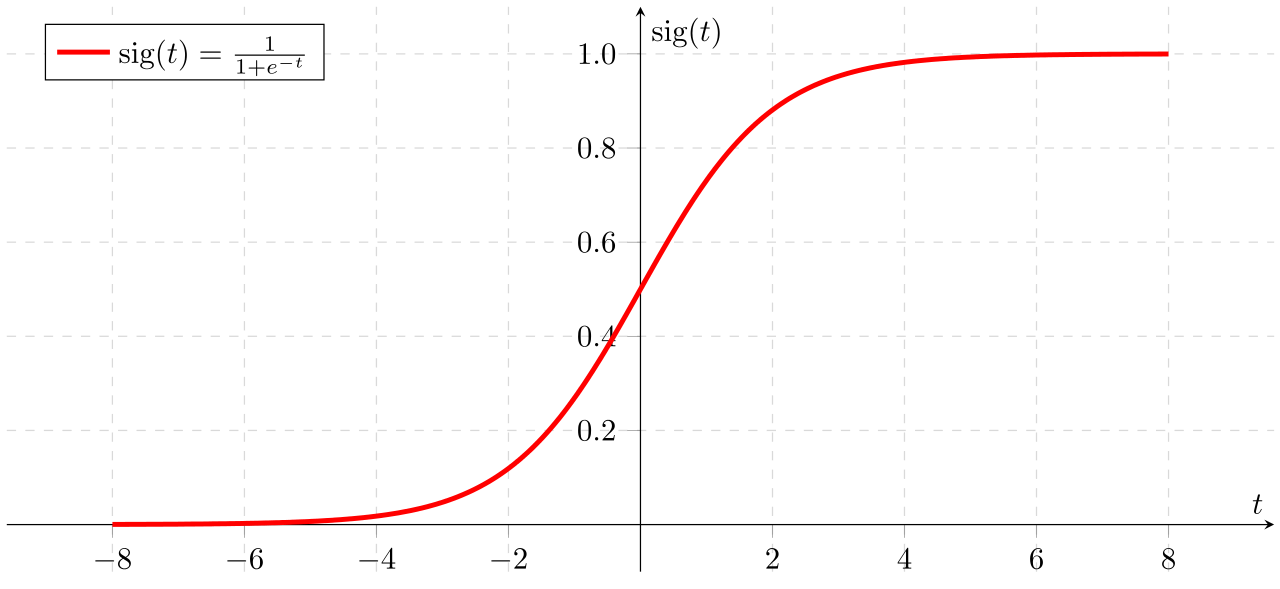

In [15]:
def sigmoid(z):
    return(1/(np.exp(-z)+1))

In [16]:
sigmoid(np.random.rand(1,5))

array([[0.50690193, 0.64159834, 0.70997242, 0.55122511, 0.71086852]])

In [17]:
def linear_prop(X,W,b):
    z=np.dot(W.T,X)+b
    return(z)

In [18]:
linear_prop(np.random.rand(3,3),np.random.rand(3,1),0.4)

array([[1.12729703, 0.85945624, 1.65558731]])

In [19]:
def forward_propagation(X,W,b):
    z=linear_prop(X,W,b)
    A=sigmoid(z)
    return(A)

In [20]:
forward_propagation(np.random.rand(3,3),np.random.rand(3,1),0.4)

array([[0.74153418, 0.82278305, 0.76172412]])

### Cost Function 

$ J(W,b) = \frac {-1}{m} \sum_{i=1}^{m}L(\hat y^{(i)},y^{(i)}) $ <br>

$ L(\hat y^{(i)},y^{(i)}) = -[y*log(\hat y) + (1-y)*log(1-\hat y)] $

In [21]:
def computation_cost(y,y_hat):
    m=len(y)
    cost=(-1/m)*((1-y)*np.log(1-y_hat)+y*np.log(y_hat)).sum()
    return(cost)

#### Lets test cost fuction

In [22]:
y=np.array([[1,0,1,1,1,0]])
y_hat=np.array([[0.954,0.214,0.998,0.987,0.745,0.214]])

print("cost :- ",computation_cost(y,y_hat))

cost :-  0.8381468834616176


## Backward propagation 

In backward propagation the calculus chain rule is applied to get gradient of Wieghts and bias.Following equations are got from chain rule  :-
- $ \partial {Z} = \hat Y - Y $
- $ \partial {W} = \partial {Z} * \frac {\partial {Z}}{\partial {W}} =(\hat Y - Y )*X $
- $ \partial {b} = \partial {Z}$    (because $\frac {\partial {Z}}{\partial {b}} = 1$)

In [23]:
def back_propagation(X,y,A):
    dW=np.dot(X,(A-y).T)
    db=(A-y).sum()
    grad={}
    grad["dW"]=dW
    grad["db"]=db
    return(grad)

#### Lets test back_propagation fuction

In [24]:
g=back_propagation(np.random.rand(3,6),y,y_hat)
print('dW := ',g['dW'],'db :=',g["db"])

dW :=  [[0.09130089]
 [0.00728914]
 [0.1685206 ]] db := 0.11199999999999993


In [25]:
def update_parameters(W,b,grad,learning_rate):
    W=W-learning_rate*grad["dW"]
    b=b-learning_rate*grad["db"]
    
    return W,b

In [26]:
def prediction(X_test,parameters):
    A=forward_propagation(X_test,parameters["W"],parameters['b'])
    
    y=np.where(A>0.5,1,0)
    return(y)

##### Let's put all together make one single function 

In [27]:
def LR(X_train,Y_train,validation_data=None,learning_rate=0.001,num_iteration=1000,verbose=0):
    dim=X_train.shape
    m=dim[1]
    
    # intializing weights 
    W,b=weight_initializer(dim)
    costs=[]
    val_costs=[]
    for i in range(num_iteration):
        # Forward_prop for traing data
        A=forward_propagation(X_train,W,b)
        
        #Compute cost for traing data
        cost=computation_cost(y_train,A)
        costs.append(cost)
        # computing validation loss
        if validation_data is not None:
            y_val=forward_propagation(validation_data[0],W,b)
            val_cost=computation_cost(validation_data[1],y_val)
            val_costs.append(val_cost)
        #Back propogation 
        grad=back_propagation(X_train,y_train,A)
        
        #update the weights
        W,b=update_parameters(W,b,grad,learning_rate)
        
        if validation_data is not None:
            if verbose==1:
                print("{}--> train_loss= {} ,val_loss = {}".format(i,cost,val_cost))
        if validation_data==None and verbose==1:
            print("{}--> train_loss= {}".format(i,cost))
    if validation_data is not None:
        out_values={"parameters":{"W":W,"b":b},"loss":costs,"val_loss":val_costs}
    else:
        out_values={"parameters":{"W":W,"b":b},"loss":costs}
    return(out_values)

### Data Preprocessing

In [28]:
X_train=train_x_set/255
X_train.max()

1.0

In [29]:
y_train=train_y_set

In [30]:
test_data.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [31]:
test_set_x=np.array(test_data.get('test_set_x'))
test_set_y=np.array(test_data.get('test_set_y'))

In [32]:
print(test_set_x.shape)
print(test_set_y.shape)

(50, 64, 64, 3)
(50,)


In [33]:
test_x_set=test_set_x.reshape(test_set_x.shape[0],test_set_x.shape[1]*test_set_x.shape[2]*test_set_x.shape[3]).T/255
test_y_set=test_set_y.reshape(1,test_set_y.shape[0])

In [34]:
print(test_x_set.shape)
print(test_y_set.shape)

(12288, 50)
(1, 50)


In [35]:
val_data=(test_x_set,test_y_set)

### Let's train our LR model

In [36]:
out_parameters=LR(X_train,y_train,validation_data=val_data,learning_rate=0.0001,num_iteration=1000,verbose=1)

0--> train_loss= 144.86776073702856 ,val_loss = 229.01341957073237
1--> train_loss= 461.43890582525637 ,val_loss = 128.84584917718146
2--> train_loss= 1149.8245508970813 ,val_loss = 691.036809356063
3--> train_loss= 1386.7640644981457 ,val_loss = 138.43324188143364
4--> train_loss= 284.4336838904128 ,val_loss = 151.54241134177437
5--> train_loss= 1351.024776202426 ,val_loss = 628.3341475604618
6--> train_loss= 1262.7462917030853 ,val_loss = 80.20065805021514
7--> train_loss= 176.13550585165635 ,val_loss = 132.2879546286288
8--> train_loss= 1178.0921461617845 ,val_loss = 665.7275379918633
9--> train_loss= 1338.7115251217172 ,val_loss = 114.14303154730557
10--> train_loss= 239.3600889934567 ,val_loss = 147.10601764593093
11--> train_loss= 1309.024977676625 ,val_loss = 622.2607786012528
12--> train_loss= 1252.921174582769 ,val_loss = 75.56207668835897
13--> train_loss= 168.458992024537 ,val_loss = 123.06545769559705
14--> train_loss= 1093.4389112352958 ,val_loss = 669.6447643674549
15--> 

126--> train_loss= 822.4401511651699 ,val_loss = 32.0236011463804
127--> train_loss= 144.63269685217307 ,val_loss = 286.39317591054896
128--> train_loss= 542.5826998169474 ,val_loss = 60.647297811759394
129--> train_loss= 448.3064194784697 ,val_loss = 564.5913478816843
130--> train_loss= 1096.716476517346 ,val_loss = 54.229885880758125
131--> train_loss= 97.04328585155977 ,val_loss = 41.37082578131398
132--> train_loss= 254.80812546073952 ,val_loss = 457.9686484759214
133--> train_loss= 881.8276179872411 ,val_loss = 31.37787613479219
134--> train_loss= 103.37500706758144 ,val_loss = 161.46669671481993
135--> train_loss= 295.5646288155327 ,val_loss = 88.59303020896945
136--> train_loss= 696.1029317131346 ,val_loss = 580.1330640388884
137--> train_loss= 1125.4331639317627 ,val_loss = 62.67356425767322
138--> train_loss= 108.65403436918349 ,val_loss = 50.93419743638927
139--> train_loss= 344.5024800379513 ,val_loss = 515.7658803390273
140--> train_loss= 995.5429027498406 ,val_loss = 38.82

250--> train_loss= 51.385311471599834 ,val_loss = 38.85794653009221
251--> train_loss= 53.71234167659881 ,val_loss = 60.543221272669584
252--> train_loss= 70.96100623792812 ,val_loss = 44.96370970692292
253--> train_loss= 180.81204503841406 ,val_loss = 347.181263323156
254--> train_loss= 619.6393961902978 ,val_loss = 47.08348217607188
255--> train_loss= 200.9373723843021 ,val_loss = 372.57257222354826
256--> train_loss= 669.7742254568711 ,val_loss = 42.93701085440415
257--> train_loss= 154.74326769159535 ,val_loss = 303.185220962019
258--> train_loss= 530.8557569062964 ,val_loss = 55.13169463491803
259--> train_loss= 278.8445191248993 ,val_loss = 447.83352896806684
260--> train_loss= 819.2802617916875 ,val_loss = 37.808888823833605
261--> train_loss= 67.76218250524485 ,val_loss = 104.5166125278839
262--> train_loss= 147.42334215955518 ,val_loss = 71.73125303252294
263--> train_loss= 440.9178034964426 ,val_loss = 523.4816780609765
264--> train_loss= 970.1109142519705 ,val_loss = 47.9298

396--> train_loss= 80.36490930384599 ,val_loss = 141.48791286275824
397--> train_loss= 183.8650131299176 ,val_loss = 72.15412980174712
398--> train_loss= 345.68262826888304 ,val_loss = 444.74888004232207
399--> train_loss= 776.3784217963768 ,val_loss = 45.32454604264743
400--> train_loss= 47.122470050367994 ,val_loss = 74.68300305414319
401--> train_loss= 66.71421028050572 ,val_loss = 50.225177012807094
402--> train_loss= 124.02424411975126 ,val_loss = 217.77774247683567
403--> train_loss= 326.2946178264712 ,val_loss = 70.06129446097032
404--> train_loss= 319.6948236339233 ,val_loss = 427.2769568500196
405--> train_loss= 739.3311914175085 ,val_loss = 45.54203475922519
406--> train_loss= 55.28554505134093 ,val_loss = 90.27237691005321
407--> train_loss= 91.18571106228686 ,val_loss = 57.137871018611385
408--> train_loss= 187.6224497047827 ,val_loss = 306.95785382382786
409--> train_loss= 497.7578941015018 ,val_loss = 56.57036845960133
410--> train_loss= 180.13753442276186 ,val_loss = 295

535--> train_loss= 297.386310225222 ,val_loss = 66.1691967470622
536--> train_loss= 168.6925755644745 ,val_loss = 220.51755916065753
537--> train_loss= 293.41061839218827 ,val_loss = 66.21168463946564
538--> train_loss= 167.69550766474214 ,val_loss = 218.63569346058145
539--> train_loss= 289.31208933215703 ,val_loss = 66.24834573417341
540--> train_loss= 166.66424216773316 ,val_loss = 216.7305487990285
541--> train_loss= 285.1803597772235 ,val_loss = 66.27787879429523
542--> train_loss= 165.5869782033686 ,val_loss = 214.7861954595974
543--> train_loss= 280.9864942964451 ,val_loss = 66.30017528622065
544--> train_loss= 164.46314741127856 ,val_loss = 212.80168183556694
545--> train_loss= 276.72964595379324 ,val_loss = 66.31485297716159
546--> train_loss= 163.28968237074457 ,val_loss = 210.77275720575588
547--> train_loss= 272.4028559955768 ,val_loss = 66.3215196218003
548--> train_loss= 162.06347176723824 ,val_loss = 208.6951503799262
549--> train_loss= 267.99919902351803 ,val_loss = 66.

683--> train_loss= 17.09738846970876 ,val_loss = 61.554631254015106
684--> train_loss= 17.023731733171054 ,val_loss = 61.573203331922805
685--> train_loss= 16.950937498304082 ,val_loss = 61.591867375094075
686--> train_loss= 16.87899372474414 ,val_loss = 61.610617822365356
687--> train_loss= 16.807888555006322 ,val_loss = 61.62944918598331
688--> train_loss= 16.737610306737924 ,val_loss = 61.64835609337115
689--> train_loss= 16.668147465660006 ,val_loss = 61.667333255055716
690--> train_loss= 16.59948867915612 ,val_loss = 61.68637549814041
691--> train_loss= 16.53162275046783 ,val_loss = 61.705477739100225
692--> train_loss= 16.464538633456804 ,val_loss = 61.724635008898616
693--> train_loss= 16.39822542789432 ,val_loss = 61.74384243502276
694--> train_loss= 16.33267237523929 ,val_loss = 61.763095260008306
695--> train_loss= 16.26786885486777 ,val_loss = 61.782388827208905
696--> train_loss= 16.20380438071701 ,val_loss = 61.8017185934264
697--> train_loss= 16.14046859830936 ,val_loss =

827--> train_loss= 11.524938500400848 ,val_loss = 63.94911616981359
828--> train_loss= 11.504927964434287 ,val_loss = 63.96156510271771
829--> train_loss= 11.485044391668664 ,val_loss = 63.9739650176008
830--> train_loss= 11.465286401654273 ,val_loss = 63.9863162807821
831--> train_loss= 11.44565263327702 ,val_loss = 63.9986192580208
832--> train_loss= 11.4261417444387 ,val_loss = 64.01087431348112
833--> train_loss= 11.40675241174348 ,val_loss = 64.02308180856689
834--> train_loss= 11.387483330190141 ,val_loss = 64.0352421037031
835--> train_loss= 11.368333212870485 ,val_loss = 64.04735555765045
836--> train_loss= 11.349300790673029 ,val_loss = 64.05942252668093
837--> train_loss= 11.330384811992634 ,val_loss = 64.07144336600865
838--> train_loss= 11.311584042445494 ,val_loss = 64.08341842816745
839--> train_loss= 11.292897264589314 ,val_loss = 64.09534806411789
840--> train_loss= 11.274323277649017 ,val_loss = 64.10723262290948
841--> train_loss= 11.255860897247334 ,val_loss = 64.119

962--> train_loss= 9.596002197391329 ,val_loss = 65.30598995168407
963--> train_loss= 9.585598293313742 ,val_loss = 65.31430651533111
964--> train_loss= 9.57523253484183 ,val_loss = 65.32260515420202
965--> train_loss= 9.56490465088973 ,val_loss = 65.33088598277784
966--> train_loss= 9.554614373130415 ,val_loss = 65.33914911424134
967--> train_loss= 9.544361435961159 ,val_loss = 65.34739466085568
968--> train_loss= 9.534145576469449 ,val_loss = 65.35562273388267
969--> train_loss= 9.523966534399417 ,val_loss = 65.36383344323252
970--> train_loss= 9.513824052118672 ,val_loss = 65.37202689784004
971--> train_loss= 9.50371787458576 ,val_loss = 65.38020320549526
972--> train_loss= 9.493647749317908 ,val_loss = 65.38836247285714
973--> train_loss= 9.483613426359373 ,val_loss = 65.39650480599886
974--> train_loss= 9.473614658250131 ,val_loss = 65.40463030934988
975--> train_loss= 9.463651199995084 ,val_loss = 65.41273908668798
976--> train_loss= 9.45372280903368 ,val_loss = 65.42083124061647

In [37]:
pred=prediction(val_data[0],out_parameters['parameters'])

In [38]:
pred

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0]])

In [39]:
test_point=test_x_set[:,0]

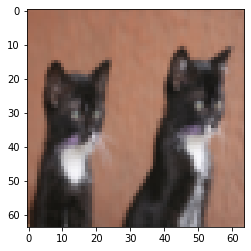

In [40]:
plt.imshow(test_set_x[0])

In [41]:
prediction(test_point,out_parameters['parameters'])

array([1])

## Evaluating Model

In [42]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [43]:
test_y_set

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]], dtype=int64)

In [44]:
pred

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0]])

In [45]:
print("Accuracy_Score=",accuracy_score(test_y_set.reshape(50),pred.reshape(50)))

Accuracy_Score= 0.68


In [46]:
print(classification_report(test_y_set.reshape(50),pred.reshape(50)))

              precision    recall  f1-score   support

           0       0.52      0.65      0.58        17
           1       0.79      0.70      0.74        33

    accuracy                           0.68        50
   macro avg       0.66      0.67      0.66        50
weighted avg       0.70      0.68      0.69        50



In [47]:
print(confusion_matrix(test_y_set.reshape(50),pred.reshape(50)))

[[11  6]
 [10 23]]
